1646226174.0
-0.00010925600290027227


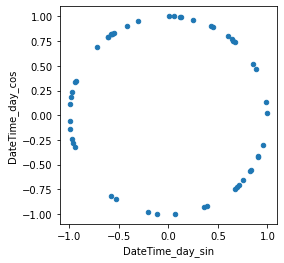

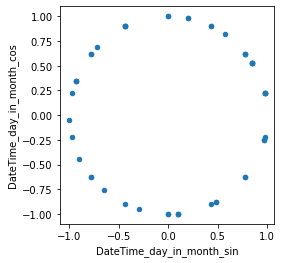

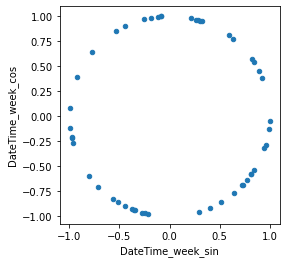

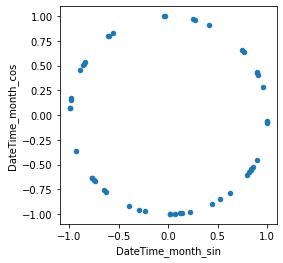

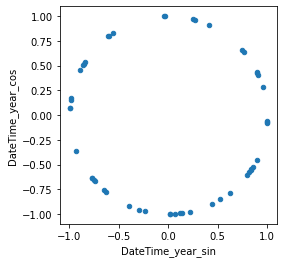

In [59]:
import calendar
import datetime
import random

def random_date(start_date):
  random_number_of_days = random.randrange(0, 31)
  random_number_of_hours = random.randrange(0, 23)
  random_number_of_minutes = random.randrange(0, 59)
  random_number_of_seconds = random.randrange(0, 59)
  random_date = start_date + datetime.timedelta(days=random_number_of_days)
  random_date += datetime.timedelta(days=random_number_of_days)
  random_date += datetime.timedelta(hours=random_number_of_hours)
  random_date += datetime.timedelta(minutes=random_number_of_minutes)
  random_date += datetime.timedelta(seconds=random_number_of_seconds)
  return random_date

start_date = datetime.datetime(2022, 1, 1, 0, 0, 0)
dates = [random_date(start_date) for x in range(50)]
dates

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.DataFrame(dates, columns=['DateTime'])
df

ts = datetime.datetime.timestamp(random_date(start_date))
print(ts)
print(np.sin(2*np.pi*ts/24*60*60))


seconds_in_day = 24*60*60
df['DateTime_day_sin'] = df['DateTime'].apply(lambda x: np.sin(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_day))
df['DateTime_day_cos'] = df['DateTime'].apply(lambda x: np.cos(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_day))

df['DateTime_day_in_month_sin'] = df['DateTime'].apply(lambda x: np.sin(2*np.pi*x.day/calendar.monthrange(x.year, x.month)[1]))
df['DateTime_day_in_month_cos'] = df['DateTime'].apply(lambda x: np.cos(2*np.pi*x.day/calendar.monthrange(x.year, x.month)[1]))

seconds_in_week = 24*60*60*7
df['DateTime_week_sin'] = df['DateTime'].apply(lambda x: np.sin(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_week))
df['DateTime_week_cos'] = df['DateTime'].apply(lambda x: np.cos(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_week))

seconds_in_month = 24*60*60*7*4
df['DateTime_month_sin'] = df['DateTime'].apply(lambda x: np.sin(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_month))
df['DateTime_month_cos'] = df['DateTime'].apply(lambda x: np.cos(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_month))

seconds_in_year = 24*60*60*7*4*12
df['DateTime_year_sin'] = df['DateTime'].apply(lambda x: np.sin(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_month))
df['DateTime_year_cos'] = df['DateTime'].apply(lambda x: np.cos(2*np.pi*datetime.datetime.timestamp(x)/seconds_in_month))


df.drop('DateTime', axis=1, inplace=True)

df.sample(50).plot.scatter('DateTime_day_sin','DateTime_day_cos').set_aspect('equal');
df.sample(50).plot.scatter('DateTime_day_in_month_sin','DateTime_day_in_month_cos').set_aspect('equal');
df.sample(50).plot.scatter('DateTime_week_sin','DateTime_week_cos').set_aspect('equal');
df.sample(50).plot.scatter('DateTime_month_sin','DateTime_month_cos').set_aspect('equal');
df.sample(50).plot.scatter('DateTime_year_sin','DateTime_year_cos').set_aspect('equal');
